https://techblog-history-younghunjo1.tistory.com/132

https://wooono.tistory.com/233

https://itrepo.tistory.com/36
   

# 1. ResNet(Residual Network)

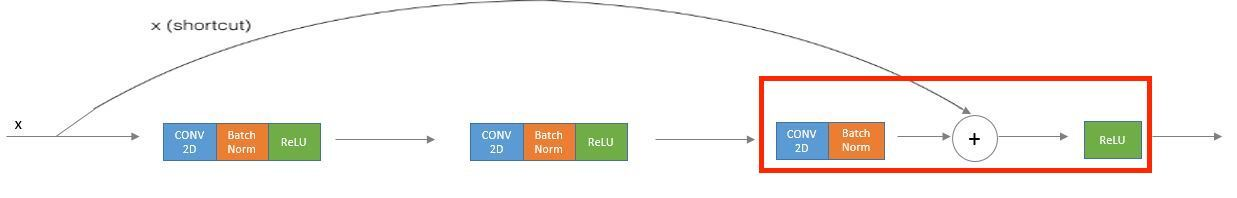
그림과 같은 3개의 layer가 존재하는 CNN모델의 일부가 있다고 가정하자. x에 이미지 데이터가 입력될 것이며 Convolution 연산을 거친다. 우리가 주목해야 할 부분 'shortcut'이라고 나타내는 부분과 빨간색 네모칸이다. 빨간색 네모칸은 x라는 입력 데이터가 2번의 Convolution 연산을 거치고 난 후 3번째 Convolution을 계산할 차례이다. 

 

그런데 특이한 점이 한 가지 있다. 바로 3번째 Convolution 연산과 Batch Normalization을 거치고 난 후 도출된 결과값에 '무엇'인가를 더해주고 있다. 이 '무엇'이 어디서 왔는지 추적하기 위해 화살표를 역으로 따라가 보면 입력 데이터의 값이라는 것을 알 수 있다.

 

평범한 CNN의 같은 경우에는 3번째 컨볼루션을 거치고 난 결과값에 바로 Relu라는 비선형 함수로 활성함수를 취할텐데 ResNet은 활성함수를 취하기 이전에 입력 데이터의 값을 더해주고 난 후 활성함수를 취하는 것이다. 물론 위 예시 같은 경우는 더해주는 값이 입력 데이터이지만 밑의 그림과 같이 중간 layer의 활성함수를 전달해도 무방하다.


이렇게 입력 데이터 또는 이전의 layer로 나온 결과값을 그대로 이후의 layer에 전달하는 과정을 Shortcut 또는 Skip connection 이라고도 부른다.

 

그런데 위와 같은 전달 방법은 한 가지 문제라고 할 수 있는 것이 있다. Convolution은 애초에 입력 데이터의 사이즈를 줄여주는 Convolution을 수행하거나 Pooling을 수행함으로써 진행을 하게 된다.(물론 1 by 1 Convolution만을 사용하면 사이즈는 줄지 않지만 보통은 사이즈를 줄이는 것이 CNN의 목적이다) 그렇게 된다면 몇 단계 이전의 layer에서 결과를 얻은  a_1(1번 layer에서 얻은 activation 값)의 차원 수는 이 a_1을 shortcut으로 전달하려는 뒤 쪽 layer의 z_3(3번 layer에서 얻는 컨볼루션 후의 값. 

즉, 아직 활성함수를 취하기 이전의 상태)과 차원 수가 다를 가능성이 있어 연산이 불가능할 수 있기 때문이다.

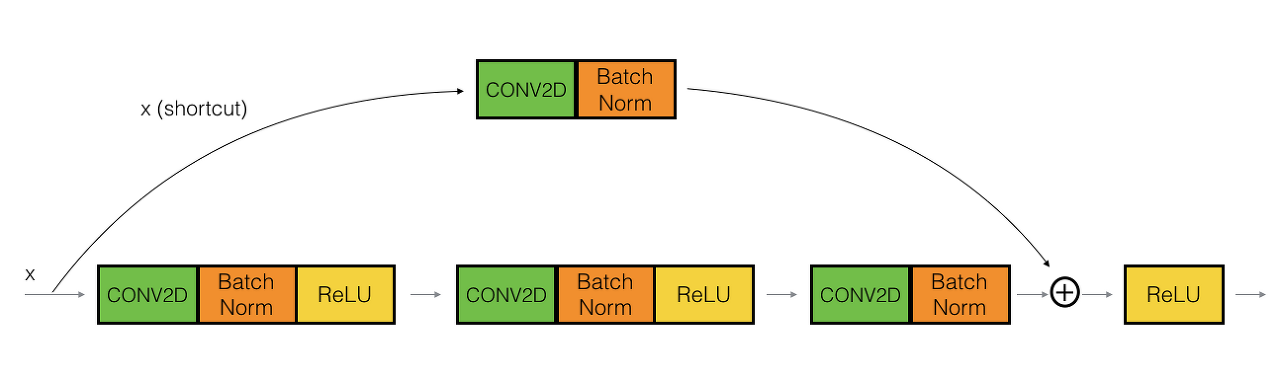
위 그림에서 보는 것처럼 shortcut으로 전달하려는 x에 Convolution을 적용해 이후 layer의 z값과 사이즈를 일치시켜주는 것이다. 그래서 만약 위와 같은 과정을 수행하고 싶지 않다면 전달하려는 a_1값이 존재하는 layer에서 이 a_1값을 전달 받을 이후의 layer로 신경망이 진행될 때는 동일한 사이즈로 Convolution을 진행해주는 것이 좋다. 그래야 차원 불일치 문제가 발생하지 않을 것이다.

## [Skip-connection의 효과]

https://lswook.tistory.com/105

https://at0z.tistory.com/164

1. Vanishing gradient 개선

완전히 문제를 해결하는 것은 아니나, 크게 개선됨. + 연산을 통해 x그대로 살아서 J까지 이동됨
그리고 Vanishing gradient 개선을 통해 Training 속도에 기여할수 있음(학습속도 빨라짐, 수렴 속도 빨라짐)

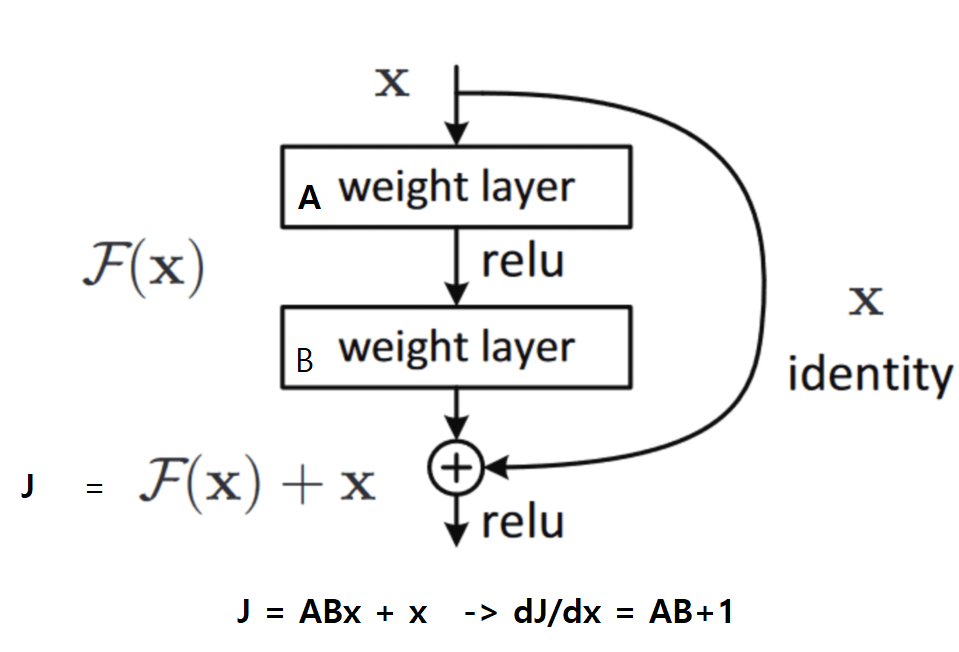

2. 앙상블 효과와 레이어간 의존성 개선 (->일반화 성능 향상)

residual networks는 다른 길이의 여러 paths를 만드는 효과를 갖는다.(앙상블 효과, 드랍아웃과 유사한 효과로 드랍아웃도 노드를 하나씩 지워 여러모델을 보팅한 효과를 갖듯이 Skip Connection도 여러 path를 생성하여 앙상블 효과를 갖는다)

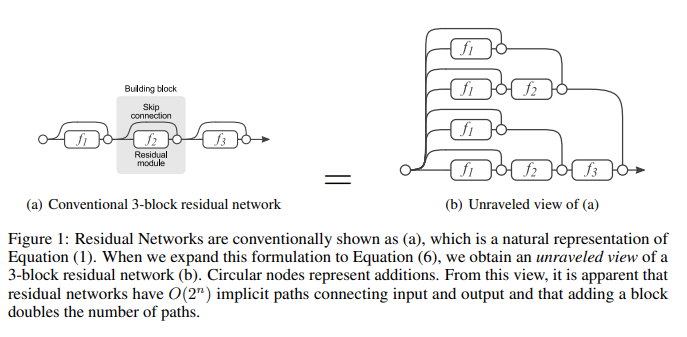

아래 사진과 같은 실험을 통해 test time에 residual networks는 skip connection으로 인해 single layers를 제거해도 performance에 영향이 미세하다는 것을 관찰했다. 반면에 VGG와 같은 traditional architecture는 layer를 제거하면, performance에서 급격한 저하가 나타나는 것과는 확연히 다른 결과다. 이는 dropout[9]과 비슷하다. dropout은 training 중 중에 개별 neurons를 삭제하면 기하 급수적으로 많은 network의 ensemble을 평균하는 것과 동일한 network가 생성한다.

residual networks는 layers 삭제에 강한 모습을 나타내지만, VGG는 그렇지 않다. unraveled view에서는 residual network를 표현하는 것에 대해 residual network를 많은 경로의 모음으로 볼 수 있다는 관점을 제시한다. VGG와 같은 전통적인 layer structure에서 각 처리 layer는 이전 layer의 출력에만 의존하는 반면에 residual network의 각 모듈 fi(·)는 이전 i-1 residual module의 가능한 모든 구성에서 생성된 다른 distribution의 2^(i-1)개의 mixture에서 data을 제공받는다.

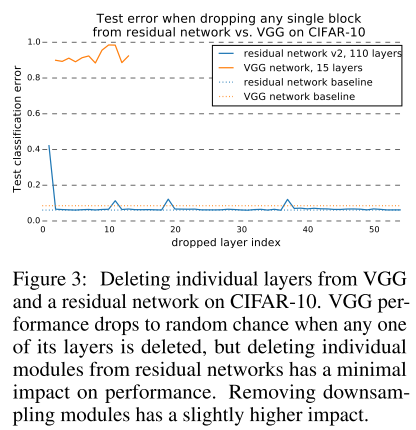

3. 정보 복원의 목적

위에서의 역할을 수행하는 skip connection을 short skip connection이라고 한다.
그리고 정보 복원의 목적을 갖는 skip connection을 long skip connection이라고 한다. 정리하자면 아래와 같다.

    1) short skip connections : deep한 network를 학습할 때, 뒤로 갈 수록 사라지는 gradient를 살리거나 gradient vanishing (기울기 소실) 문제를 해결할 수 있다. 대표적인 예로 Resnet이 있다. 
 
    2) long skip connections : downsampling 중 손실되는 spatial 정보를 복구하는데 도움이 된다. (where)
    
차원의 layer는 너무 추상화된 정보는 갖기 때문에 semantic segmentation 같은 task에서는 long skip connections가 사용된다. layer의 size가 줄어들수록 receptive field가 증가해(?) detail한 부분보다 structure에 집중한다. 하지만 segmentation 혹은 디코더 부분에서는 detail한 부분이 중요하기 때문에 encoder와 decoder가 long skip connections로 연결해야 한다.

long skip connection을 사용하지 않는다면, 정보는 매우 추상적으로 반환될 것이기 때문에 long skip connection을 사용하지 않고 encoder 마지막 부분 layer의 작은 receptive field만 사용해 upsampling 과정을 진행하면, detail한 부분을 회복할 수 없다. structure의 표현은 보다 정확할 수 있지만, detail에 대한 표현이 부족할 것이다. 이러한 경우에 디코더 단에 초기의 정보를 추가(feature re-use)해줌으로써 정보를 복원하는데 도움을 준다.
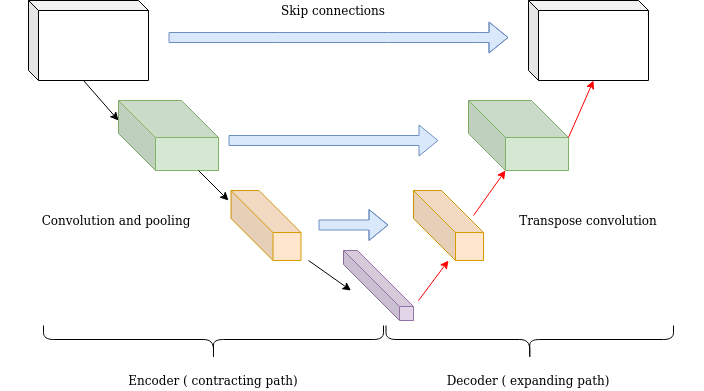


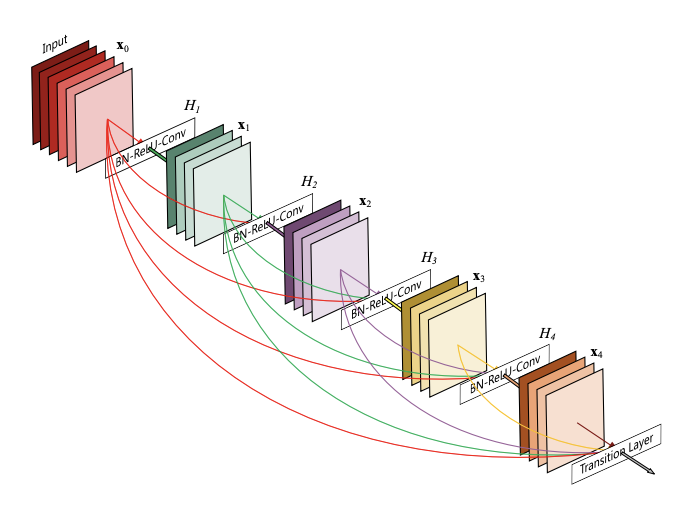

                                                             <dense net>

아래 학습 및 검증시의 성능 그래프를 보면, 아래와 같은 결론을 생각해볼수 있다. 

(b)그래프처럼 short skip connection은 training에 도움이 된다. converge가 더 빠르다. 이는 residual structure가 gradient vanishing에 더 강력하기 때문이다.

(c)그래프처럼 long skip connection은 encoder layer를 decoder와 연결하기 때문에 detail을 보다 잘 표현할 수 있다.

그리고 (a) 그래프처럼 가장 좋은 것은 short과 long 둘 다 쓰는 것이다.

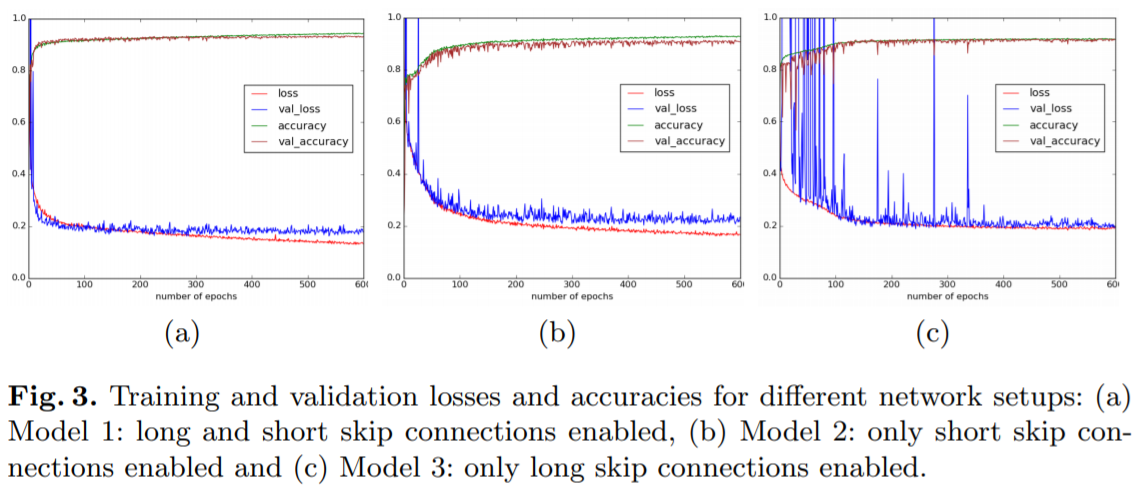

# 2. Inception Network / Pointwise Convolution (1x1 Convolution)


인셉션 네트워크를 이해하기에 앞서 한 가지 특이한 컨볼루션 사이즈 형태를 소개한다. 바로 1 by 1 사이즈의 Convolution 연산이다. 1 by 1 Convolution은 입력 데이터 사이즈를 줄이지 않고 channel 개수(또는 filter 개수)만을 늘리거나 줄이기 또는 유지하기 위해서 자주 사용된다. 좀 더 직관적으로 이해하기 위해 다음 그림을 살펴보자.

연산 결과는 오른쪽 초록색 직육면체와 같다. 즉 사이즈가 (5, 5, 128)이 되었는데, 이는 결국 입력 데이터의 높이와 너비 사이즈를 줄이지 않고 필터의 개수만 늘려 (5, 5, 3) 에서 (5, 5, 128)이 되었음을 의미한다.

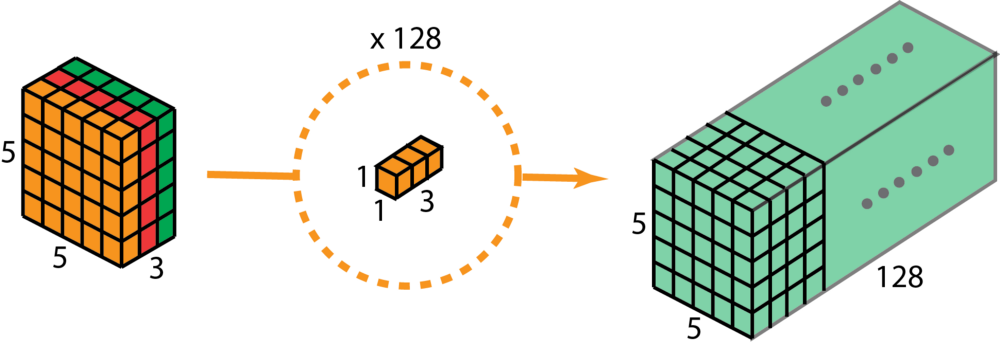

그렇다면 이 1 by 1 Convolution을 대체 왜 사용할까? 바로 정보를 손실하지 않으면서 계산해야 할 파라미터 개수를 줄여줌으로써 컴퓨팅 연산량을 줄일 수 있기 때문이다. 이러한 특성을 갖는 컨볼루션을 사용하는 것이 Inception Network이고 결국 Inception Network도 내세우는 장점은 바로 학습할 파라미터 개수를 이전에 논문에서 소개되었던 LeNet, AlexNet, VGG-16 보다 훨씬 더 줄일 수 있다는 것이다.

 

그러면 어떻게 1 by 1 Convolution이 파라미터 개수를 줄이는지 간단한 예시그림을 통해서 알아보자.

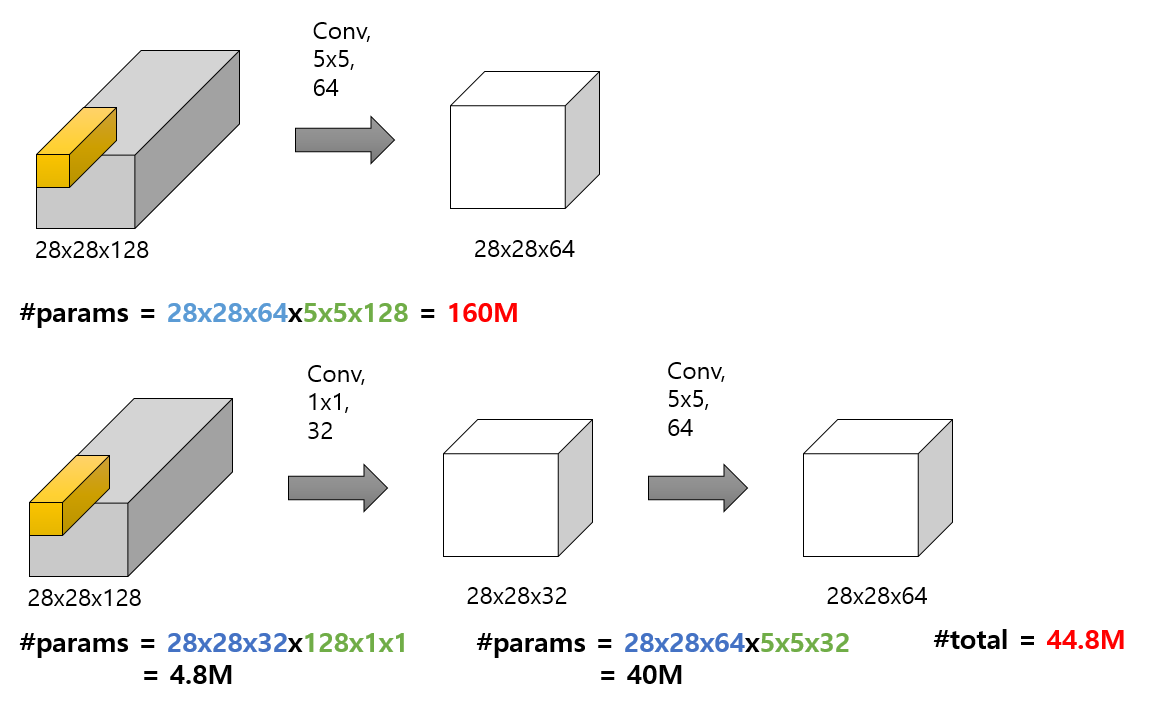

첫 번째 그림은 일반적인 CNN 처럼 5 by 5 Convolution을 사용하여 64개의 필터개수를 설정해 (28, 28, 64) 사이즈의 결과값이 도출되었다. 이 컨볼루션 연산을 하는 과정에서 계산해야 할 파라미터 개수는 1억 6천만개가 된다.(160M, M은 million을 의미) 

 

반면에 두 번째 그림은 동일한 사이즈의 입력 데이터를 1 by 1 Convolution을 먼저 사용하고 난 다음 5 by 5 Convolution을 사용한 연산 결과이다. 컨볼루션 결과 데이터의 사이즈를 첫 번째 그림과 비교해보면 (28, 28, 64) 로 동일한 사이즈이다. 그런데 두 번째 그림의 계산해야 할 파라미터 개수를 보면 4천 480만개가 된다. 결국 1 by 1 Convolution을 중간에 이용하게 되면 컴퓨팅 연산을 엄청나게 줄일 수 있다. 

어떤 사람들은 1 by 1 Convolution을 사용하게 되면 정보 손실량이 발생할 거라고 생각할 수 있는데 오히려 정보 손실량을 발생시키지 않으면서 컴퓨팅 연산을 줄여서 많은 컴퓨터 비전 연구원들이 사용하고 있다고 한다. 그리고 여담이지만 1 by 1 Convolution은 위 처럼 입력 데이터와 일반 Convolution 사이에 끼어 있다고해서 bottle neck 이라고 불리기도 한다.

### Residual Block (Bottle Neck 구조)  

Resnet은 Residual Block의 연속된 형태를 취하고, 일반적인 Residual Block은 Wide한 채널수 -> Narrow(차원 축소) -> (DepthWise, 차원 변경x) -> Wide(차원 원복, 증가)의 변형을 취한다
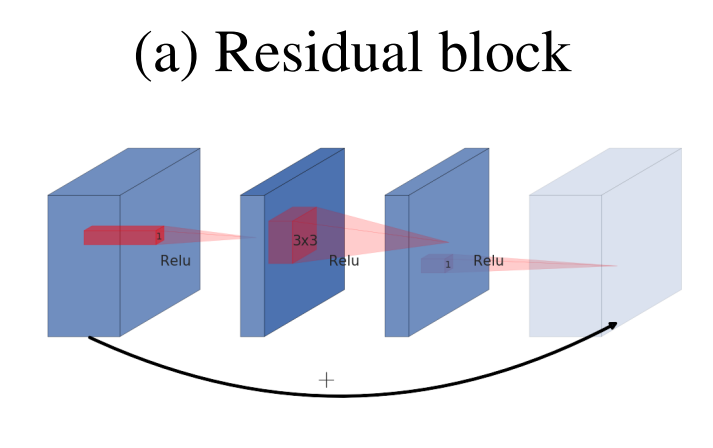



아래 그림에서 Bottle Neck의 위치는 pointwise가 일어나는 곳이다.

256채널에서 64채널로 줄어든 지점

https://coding-yoon.tistory.com/116
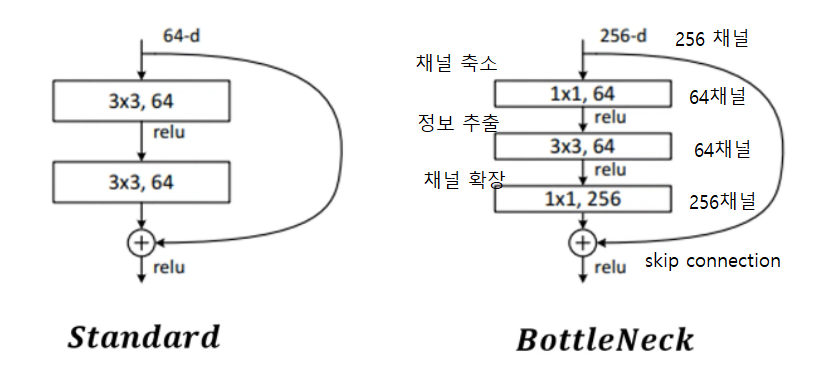

이때 차원 수의 조정은 1x1 Convolution (pointwise convolution)을 활용하여 아래그림 처럼 채널의 수를 조정할수 있게됨
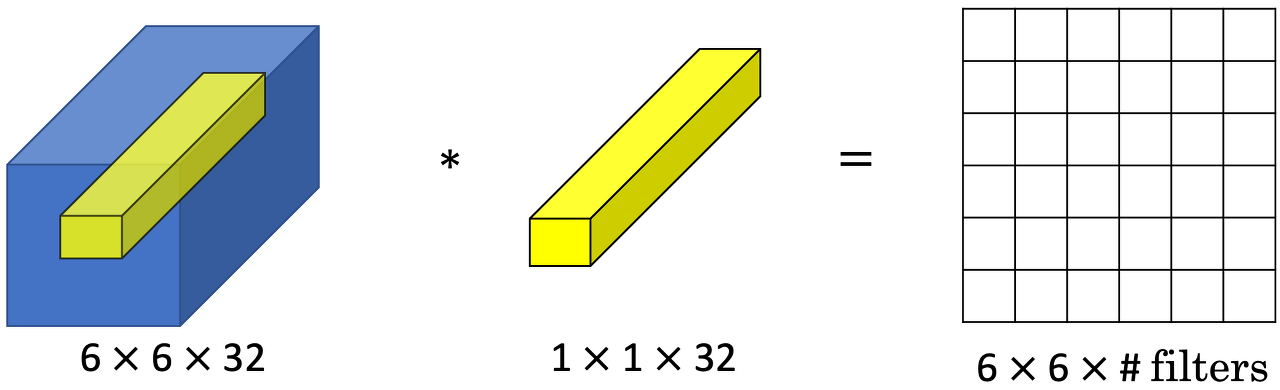


# 이 1x1 Convolution을 활용한 다른 모델 Inception Network에 대해서도 살펴보자.
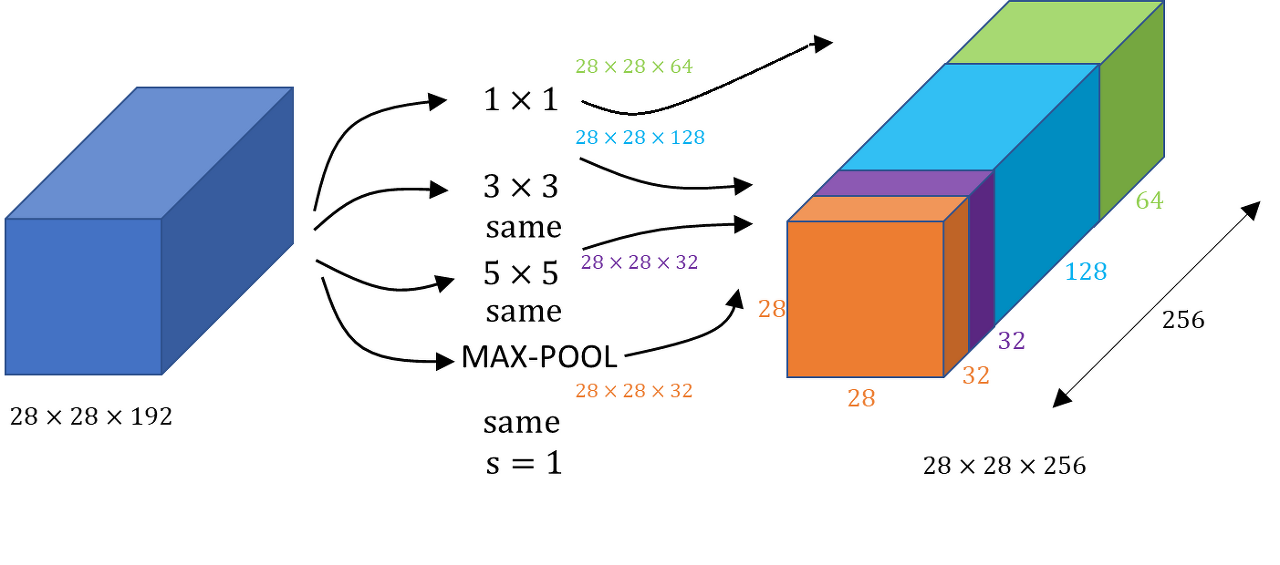
위 그림과 같이 (28, 28, 192) 사이즈를 갖는 입력 데이터가 있다고 가정하자. 이 입력 데이터를 높이와 너비 사이즈는 유지한 채 총 3번의 컨볼루션과 1번의 Max-pooling 연산을 수행해준다. 그리고 연산을 수행해준 각 결과값들은 높이와 너비가 모두 28 by 28로 같이 때문에 오른쪽 그림처럼 channel 축 방향으로 모두 합쳐준다. 이러한 아이디어로부터 Inception Network가 개발되기 시작했다.
이러한 한 모듈을 inception Module이라 한다.
 
그렇다면 실제 자주 사용되는 Inception Module을 예시로 하나 살펴보자. 

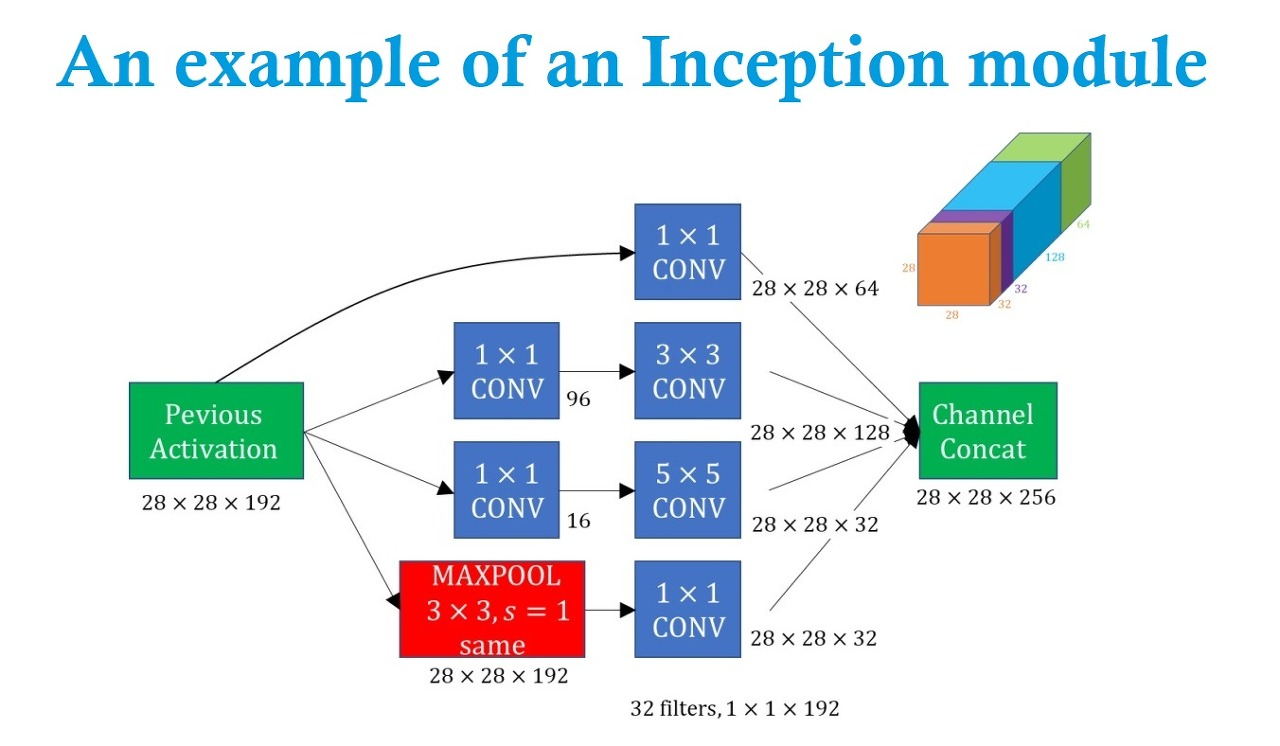
위 그림에서 보는 것처럼 일반 Convolution들 사이에 1 by 1 Convolution을 사이에 사용하고 Max pooling을 적절히 활용해 위와 같이 Inception Module을 만들 수 있다. 이러한 Inception Module이 여러개 합쳐져 매우 거대한 신경망인 Inception Network를 만들 수 있다.

# 이러한 방식으로 3x3 필터를 사용해야할지, 5x5 필터를 사용해야할지, 그리고 Pooling Layer를 원하는지 고민할 필요없이 최적 세팅으로 찾아(학습)가게 된다. 이에 따라 드는 계산량은 1x1 컨볼루션으로서 보상가능하다.

아래 사진은 GoogLeNet에 대한 모습이다.
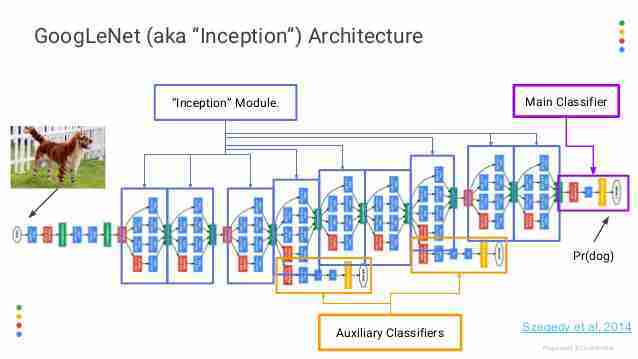


모델 초반에는 Inception Module이 들어가지 않는다.
Stem 영역이라고 하는데, 모델 초반에는 Inceoption 효과가 크지 않기 때문에 일반적인 Conv-Pool 스타일을 가지고 있다.

모델 사이에는 Max Pooling이 끼워져 있으며
모델의 마지막에는 Fully connected layer로 결과값을 출력하는 구조다.

중간에 softmax layer가 추가로 달려있는데, 이는 파라미터가 잘 업데이트되도록 도와주며, output의 성능이 나쁘지않게 도와준다. 또한 regularization 효과를 얻을 수 있고, overfitting을 방지함.


위와 같이 거대한 Inception Network를 만들 수 있는데, 중간에 Auxillary Classifiers에 대해서 언급하고 이야기를 마무리 하려 한다. Auxillary Classifiers는 일명 '곁가지 분류기'로 Inception Network는 매우 깊은 신경망이기 때문에 중간에 Vanishing Gradient 문제를 방지하기 위해서 설치된 모델들이다. 즉, 각 Auxillary Classifiers 내부 역전파로 인한 기울기값이 Inception Network의 역전파 수행시 기울기 값에 더해져 기울기 소실 문제를 예방한다는 것이다. 

이 Auxillary Classifiers에 대한 자세한 내용은 아래를 참고해보자.


https://m.blog.naver.com/PostView.nhn?blogId=laonple&logNo=220710707354&proxyReferer=https:%2F%2Fwww.google.com%2F

아래 그림은 Liwei Wang의 논문에 나오는 실험용 DNN의 구조이다.
X4의 위치에 그들이 Super Viosion이라고 부르는 Auxiliary Classifier를 배치하고
back-propagation 시에 X4위치에서 Auxiliary Classifier의 back-propagation 계산값과 최종 Output으로부터의 정상적인 back-propagation 결과를 겨합시킨다.

이렇게 되면 X4 위치에서의 Gradient가 작아지는 문제를 피할수 있다. (Gradient Vanishing 문제 개선)

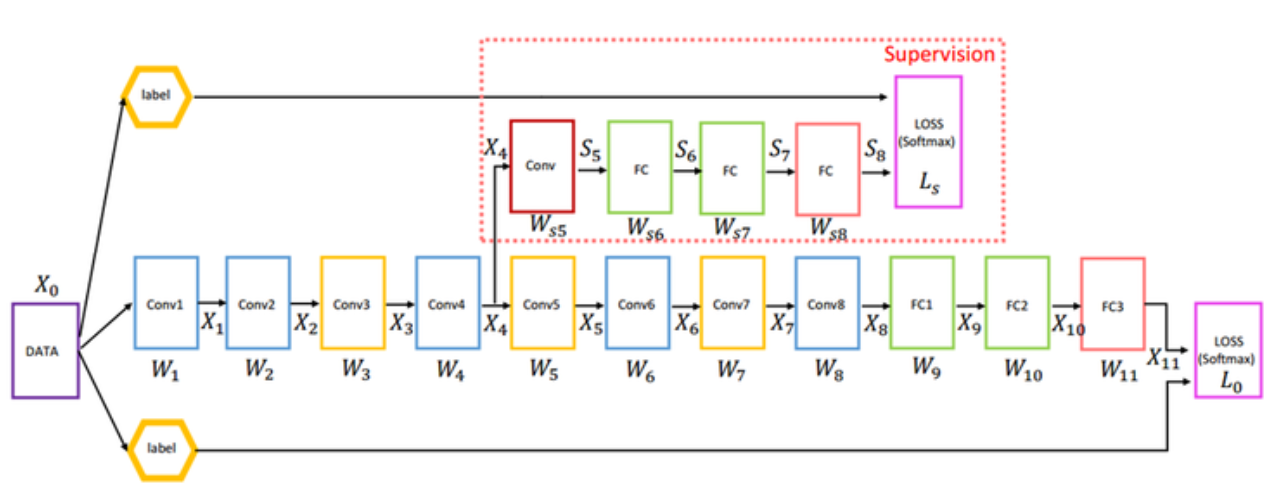

아래 그림에서 왼쪽은 Auxiliary Classifier가 없을때 Gradient가 작아지는 모습이다. 

오른쪽은 Auxiliary Classifier를 추가하여 X4의 Gradient가 작아지지 않고, 값이 다시 증가하는 모습을 보인다.

학습이 끝나고 학습된 모델을 이용할때는 Auxiliary Classifier는 삭제한다. Auxiliary Classifier는 학습을 도와주기 위한 도우미 역할만을
하고 학습을 통해 결과를 얻게되면, 제거한다.
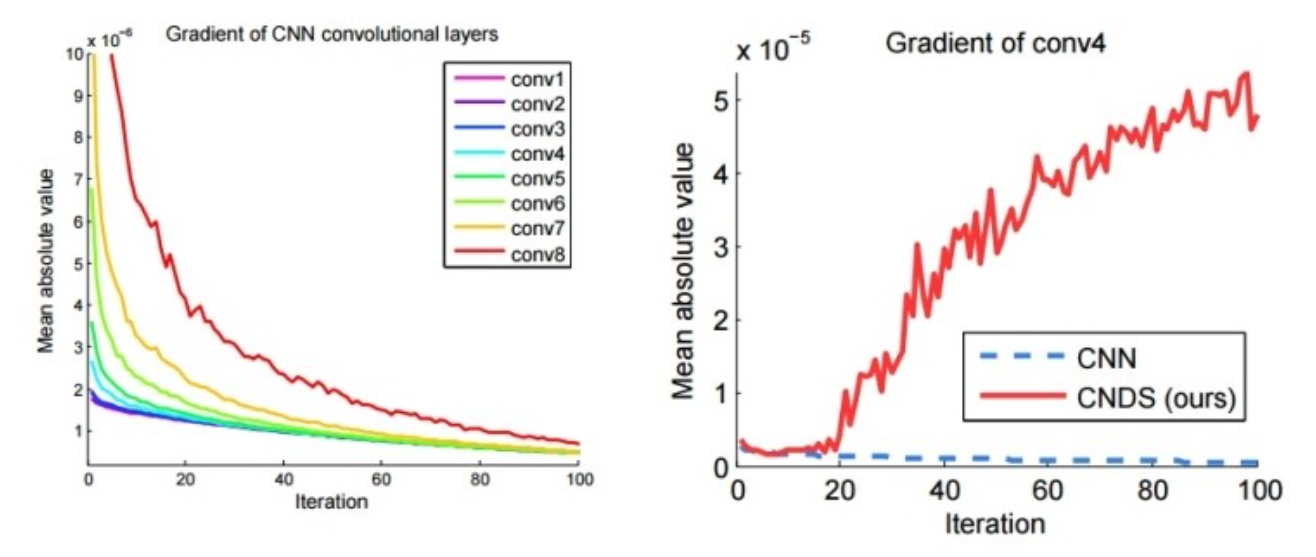